In [1]:
import os
import re 

from transformers import AutoTokenizer
from LegislationBuilder import LegislationBuilder
baseModel = "NousResearch/Llama-2-13b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(baseModel, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

LegBuilder = LegislationBuilder(tokenizer)

directory_path = 'Legislation'
leg = LegBuilder(2019, 5, preFile=True)

# Regular expression pattern to extract year and id from directory name
pattern = r'Leg-(\d{4})-(\d+)'

# List to store tuples of year and id
year_id_list = []

for dir_name in os.listdir("Legislation"):
    if os.path.isdir(os.path.join(directory_path, dir_name)):
        # Use regular expression to extract year and id
        match = re.match(pattern, dir_name)
        if match:
            year = int(match.group(1))
            id_ = int(match.group(2))
            year_id_list.append((year, id_))

print(year_id_list)
data = []
for bill in year_id_list:
    try:
        #print([bill[0], bill[1]])
        leg = LegBuilder(bill[0], bill[1], preFile=True, verbose=False)
        d = leg.metrics.to_dict()
        d['year'] = bill[0]
        d['id'] = bill[1]
        d['time'] = 0.0
        data.append(d)
    except Exception as e:
        print([bill[0], bill[1]])
        print(e)
# leg = LegBuilder(2019, 5, preFile=True)
# print(leg.summary)

/dcs/21/u2127935/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


[(2018, 30), (2001, 25), (2000, 44), (2000, 26), (2019, 5), (2012, 8), (2010, 28), (2009, 19), (2022, 6), (2010, 8), (2002, 10), (2006, 30), (2016, 24), (2009, 18), (2009, 17), (2011, 3), (2003, 17), (2019, 20), (2020, 13), (2011, 9), (2008, 1), (2020, 10), (2009, 3), (2020, 15), (2011, 16), (2013, 19), (2007, 27), (2013, 9), (2020, 21), (2018, 19), (2003, 21), (2007, 23), (2020, 29), (2000, 15), (2014, 25), (2007, 29), (2006, 40), (2006, 12), (2019, 29), (2019, 7), (2011, 7), (2021, 3), (2018, 17), (2001, 8), (2005, 18), (2009, 24), (2011, 24), (2002, 17), (2004, 34), (2015, 1), (2015, 19), (2010, 31), (2009, 6), (2014, 14), (2011, 12), (2019, 21), (2013, 21), (2000, 34), (2012, 5), (2000, 31), (2005, 3), (2009, 21), (2018, 34), (2020, 25), (2021, 23), (2009, 27), (2011, 19), (2006, 26), (2020, 28), (2007, 26), (2017, 27), (2022, 2), (2019, 11), (2016, 18), (2001, 23), (2013, 1), (2013, 31), (2000, 25), (2013, 33), (2004, 21), (2005, 7), (2021, 18), (2014, 8), (2021, 6), (2021, 26), (

In [2]:
print(len(data))

591


In [11]:
dir = "readability-fullSumm0-"
read = ["flesch_kincaid_grade","smog","gunning_fog","automated_readability_index","coleman_liau_index"]
sol = pd.DataFrame(0, columns=['grade'], index=df.index)
for r in read: 
    sol['grade'] = sol['grade'] + df[dir+r]
sol['grade'] = sol['grade']/len(read)
print(sol.mean())


grade    12.399006
dtype: float64


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
#import os
import re

# Define the directory path
directory_path = 'Legislation'

# Regular expression pattern to extract year and id from directory name
pattern = r'Leg-(\d{4})-(\d+)'

# List to store tuples of year and id
year_id_list = []

# Iterate over the directories
for dir_name in os.listdir(directory_path):
    # Check if the entry is a directory
    if os.path.isdir(os.path.join(directory_path, dir_name)):
        # Use regular expression to extract year and id
        match = re.match(pattern, dir_name)
        if match:
            year = int(match.group(1))
            id_ = int(match.group(2))
            year_id_list.append((year, id_))

# Print the list of tuples
print(len(year_id_list))
data = []
for bill in year_id_list:
    try:
        print([bill[0], bill[1]])
        leg = LegBuilder(bill[0], bill[1], preFile=True, verbose=False)
        d = leg.metrics.to_dict()
        d['year'] = bill[0]
        d['id'] = bill[1]
        d['time'] = 0.0
        data.append(d)
    except Exception as e:
        print(e)

import pandas as pd
df = pd.json_normalize(data, sep='-')
df.to_csv('legdata2.csv', index=False)


649
[2018, 30]
Preload
[2001, 25]
Preload
[2000, 44]
Preload
[2000, 26]
Preload
[2019, 5]
'NoneType' object has no attribute 'to_dict'
[2012, 8]
'NoneType' object has no attribute 'to_dict'
[2010, 28]
Preload
[2009, 19]
'NoneType' object has no attribute 'to_dict'
[2022, 6]
'NoneType' object has no attribute 'to_dict'
[2010, 8]


KeyboardInterrupt: 

In [7]:
# bills = [(2018,30), (2019, 10), (2020, 14), (2021, 2), (2022, 1)]
# bills = [(2006,22)]
# legs = [legBuilder(bill[0], bill[1], preFile=True, verbose=False) for bill in bills]
# for leg in legs:
#     print(leg.formatSummary())
print(df)

     year  id  time  text-original-n_tokens  text-original-n_unique_tokens  \
0    2018  30   0.0                    8620                           1441   
1    2001  25   0.0                     161                             43   
2    2000  44   0.0                    2158                            530   
3    2000  26   0.0                   30442                           3350   
4    2019   5   0.0                    5783                           1015   
..    ...  ..   ...                     ...                            ...   
586  2021   5   0.0                    1277                            328   
587  2006  16   0.0                   15125                           2435   
588  2003   7   0.0                    4432                            860   
589  2004   7   0.0                    4374                            919   
590  2019   6   0.0                    1060                            219   

     text-original-proportion_unique_tokens  text-original-n_ch

{'flesch_reading_ease': 0.868020304568528, 'flesch_kincaid_grade': 0.9137055837563451, 'smog': 0.8781725888324873, 'gunning_fog': 0.9120135363790186, 'automated_readability_index': 0.9052453468697124, 'coleman_liau_index': 0.6700507614213198}


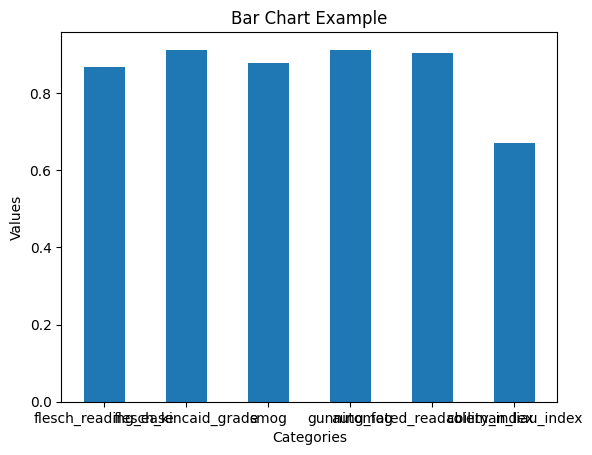

In [8]:
# Readability 
improvementPercentage = {}
improvementPercentage['flesch_reading_ease'] = len(df[df['readability-summ-flesch_reading_ease'] > df['readability-original-flesch_reading_ease']])/len(df)
lst = ['flesch_kincaid_grade', 'smog', 'gunning_fog', 'automated_readability_index', 'coleman_liau_index']
for met in lst:
    summ = 'readability-summ-' + met
    orig = 'readability-original-' + met
    improvementPercentage[met] = len(df[df[summ] < df[orig]])/len(df)
print(improvementPercentage)

keys = improvementPercentage.keys()
values = improvementPercentage.values()

import matplotlib.pyplot as plt
# Creating bar chart
plt.bar(keys, values, width = 0.5)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart Example')

# Displaying the bar chart
plt.show()

In [9]:
orig = 'readability-original-'
summ = 'readability-fullSumm0-'

read = ["flesch_kincaid_grade","smog","gunning_fog","automated_readability_index"]
original = pd.DataFrame(0, columns=['grade'], index=df.index)
summary = pd.DataFrame(0, columns=['grade'], index=df.index)
for r in read: 
    original['grade'] = original['grade'] + df[orig+r]
    summary['grade'] = summary['grade'] + df[summ+r]

original['grade'] = original['grade']/len(read)
summary['grade'] = summary['grade'] /len(read)

df['origGrade'] = original['grade']
df['summGrade'] = summary['grade']

improve = len(df[df['summGrade'] < df['origGrade']])/len(df)
print(improve)

0.9627749576988156


/tmp/dcs-tmp.u2127935/ipykernel_258970/2724453108.py:19: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  area1 = trapz(y_values1, x_values)
/tmp/dcs-tmp.u2127935/ipykernel_258970/2724453108.py:20: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  area2 = trapz(y_values2, x_values)


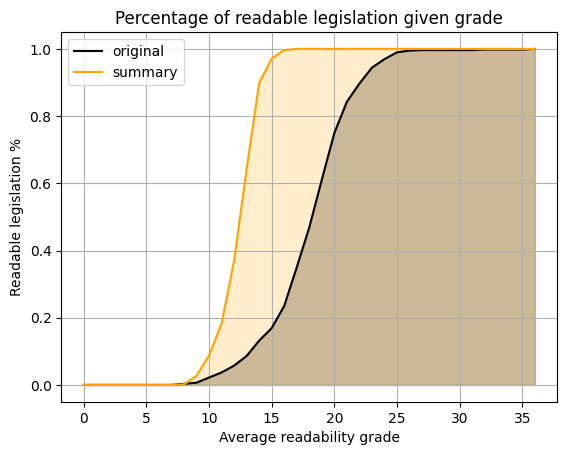

0.48765262724653596
0.6399826222161248


In [10]:
import math
import numpy as np
from scipy.integrate import trapz
import matplotlib.pyplot as plt

orig = "origGrade"
summ = "summGrade"

maxR = math.ceil(df[orig].max())+1
x_values = range(0, maxR)
y_values1 = []
y_values2 = []
for R in x_values:
    y = len(df[df[orig] < R])/len(df)
    y_values1.append(y)
    y = len(df[df[summ] < R])/len(df)
    y_values2.append(y)

area1 = trapz(y_values1, x_values)
area2 = trapz(y_values2, x_values)

plt.plot(x_values, y_values1, label='original', color='black')
plt.plot(x_values, y_values2, label='summary', color='orange')
plt.xlabel('Average readability grade')
plt.ylabel('Readable legislation %')
plt.title('Percentage of readable legislation given grade')
plt.fill_between(x_values, y_values1, color='grey', alpha=0.5)
plt.fill_between(x_values, y_values2, color='orange', alpha=0.2)
plt.grid(True)
plt.legend()
plt.show()

print(area1/maxR)
print(area2/maxR)

In [11]:
meanstdReadability1 = {}
meanstdReadability2 = {}
#% within 1std of the mean
lst = ['flesch_kincaid_grade', 'smog', 'gunning_fog', 'automated_readability_index']
for met in lst:
    summ = 'readability-original-' + met
    mean, std = [df[summ].mean(), df[summ].std()]
    within = ((df[summ] >= (mean-std)) & (df[summ] <= (mean+std))).sum().sum()
    #meanstdReadability1[met] = [mean, within/len(df[summ])]
    meanstdReadability1[met] = mean
for met in lst:
    summ = 'readability-fullSumm0-' + met
    mean, std = [df[summ].mean(), df[summ].std()]
    within = ((df[summ] >= (mean-std)) & (df[summ] <= (mean+std))).sum().sum()
    #meanstdReadability2[met] = [mean, within/len(df[summ])]
    meanstdReadability2[met] = mean

meanstdReadability1['ARI'] = meanstdReadability1.pop('automated_readability_index')
meanstdReadability2['ARI'] = meanstdReadability2.pop('automated_readability_index')
meanstdReadability1['Gunning-Fog'] = meanstdReadability1.pop('gunning_fog')
meanstdReadability2['Gunning-Fog'] = meanstdReadability2.pop('gunning_fog')
meanstdReadability1['Flesch Kincaid'] = meanstdReadability1.pop('flesch_kincaid_grade')
meanstdReadability2['Flesch Kincaid'] = meanstdReadability2.pop('flesch_kincaid_grade')
meanstdReadability1['SMOG'] = meanstdReadability1.pop('smog')
meanstdReadability2['SMOG'] = meanstdReadability2.pop('smog')
print(meanstdReadability1)
print(meanstdReadability2)

{'ARI': 19.827229410845895, 'Gunning-Fog': 19.680350269573104, 'Flesch Kincaid': 16.10118027914061, 'SMOG': 16.21212046289943}
{'ARI': 12.28327553572612, 'Gunning-Fog': 13.937242296555915, 'Flesch Kincaid': 10.10218425970543, 'SMOG': 12.901767153203547}


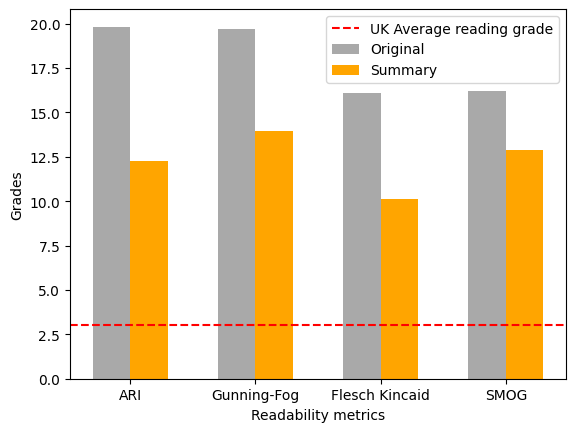

In [12]:
keys = meanstdReadability1.keys()
values1 = meanstdReadability1.values()
values2 = meanstdReadability2.values()


# Defining the width for each bar
bar_width = 0.3

# Generating positions for bars
index = range(len(keys))

# Creating bar chart
plt.bar(index, values1, bar_width, color='darkgrey', label='Original')
plt.bar([i + bar_width for i in index], values2, bar_width, color='orange', label='Summary')

plt.axhline(y=3, color='red', linestyle='--', label='UK Average reading grade')

# Adding labels and title
plt.xlabel('Readability metrics')
plt.ylabel('Grades')
plt.title('')
plt.xticks([i + bar_width / 2 for i in index], keys)
plt.legend()

# Displaying the bar chart
plt.show()

0.3537696502690985
4.40607534343415


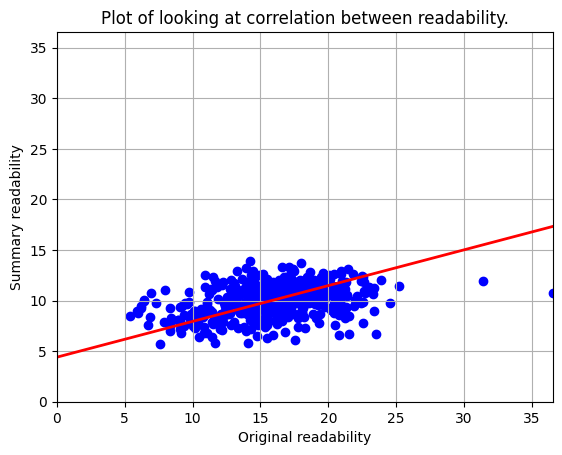

In [13]:
metric = 'flesch_kincaid_grade'
orig = 'readability-original-' + metric 
summ = 'readability-fullSumm0-' + metric

sorted_df = df.sort_values(by=orig)

import matplotlib.pyplot as plt

plt.scatter(sorted_df[orig], sorted_df[summ], marker='o', color='blue')
plt.xlabel('Original readability')
plt.ylabel('Summary readability')
plt.title('Plot of looking at correlation between readability.')


correlation_coefficient = sorted_df[orig].corr(sorted_df[summ])
intercept = sorted_df[summ].mean() - correlation_coefficient * sorted_df[orig].mean()
x_values = np.linspace(0, sorted_df[orig].max(), 100)
y_values = correlation_coefficient * x_values + intercept
plt.plot(x_values, y_values, color='red', label='Correlation Line', linewidth=2)

print(correlation_coefficient)
print(intercept)
plt.grid(True)
plt.xlim(0, sorted_df[orig].max())
plt.ylim(0, sorted_df[orig].max())
plt.show()

8519.030456852792
2314.067681895093
Correlation coeffecient: 0.17941026244844502


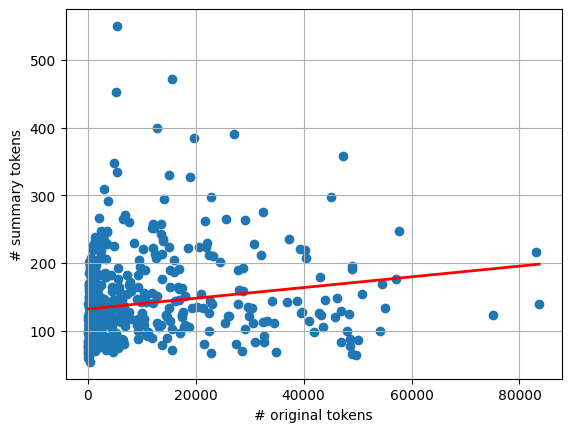

In [14]:
print(df['text-original-n_tokens'].mean())
print(df['text-fullSumm0-n_tokens'].mean())

def scatter(x, y, xname="x axis", yname="y axis", title="", line=True, square=False):
    sorted_df = df.sort_values(by=x)
    plt.scatter(sorted_df[x], sorted_df[y], marker='o', linestyle='-')
    plt.xlabel(xname)  # Label for x-axis
    plt.ylabel(yname)  # Label for y-axis
    plt.title(title)     # Title of the plot
    plt.grid(True)              # Show grid

    if line:
        coefficients = np.polyfit(df[x], df[y], 1)
        line = np.poly1d(coefficients)
        x_values = np.linspace(min(df[x]), max(df[x]), 100)
        y_values = line(x_values)
        plt.plot(x_values, y_values, color='red', label='Correlation Line', linewidth=2)

    max_value = max(max(df[x]), max(df[y]))

    if square:
        plt.xlim(0, max_value)
        plt.ylim(0, max_value)

    correlation_coefficient = sorted_df[x].corr(sorted_df[y])
    print("Correlation coeffecient: " + str(correlation_coefficient))
    plt.show()

orig = 'text-original-' + 'n_tokens'
summ = 'text-summ-' + 'n_tokens'
xname = '# original tokens'
yname = '# summary tokens'
scatter(orig, summ, xname, yname, line=True, square=False)

In [146]:
import rouge_score
def extract_rouge_metrics(row):
    print(type(row['summarisation-full_part-rouge-rouge1']))
    if isinstance(row['summarisation-full_part-rouge-rouge1'], rouge_score.scoring.Score ):
        parts = str(row['summarisation-full_part-rouge-rouge1']).split(',')
        precision = float(parts[0].split('=')[1])
        recall = float(parts[1].split('=')[1])
        fmeasure = float(parts[2].split('=')[1][:-1])  # Removing ')' from the end
        return fmeasure
    else:
        return row['summarisation-full_part-rouge-rouge1']

#print(df)
#df['x'] = df.apply(extract_rouge_metrics, axis=1)
print(df['x'])

<class 'str'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'rouge_score.scoring.Score'>
<class 'rouge_score.scoring.Score'>
<class 'float'>
<class 'float'>
<c

In [ ]:
rouge = 'summarisation-full_summ0-rouge-' + 'rouge1'
readability = 'readability-fullSumm0-' + 'flesch_reading_ease'
length = 'text-original-n_tokens'

xname = 'ROUGE1'
yname = 'Readability measure'
scatter(rouge, readability, xname, yname, line=True, square=False) 
scatter(rouge, length, line = True )           # Show grid

In [130]:
result = df[df['orthographic-summary'] > 10].loc[:, ['year', 'id', 'orthographic-summary']]

print(result)
print(len(result)/len(df))

def clean(row):
    leg = LegBuilder(row['year'], row['id'], preFile=True, verbose=False)
    return len([m for m in leg.metrics.summaryMatches if m.ruleId != "MORFOLOGIK_RULE_EN_US" ])

# df['orthographic-summary'] = df.apply(lambda row: clean(row), axis=1)
# result = df[df['orthographic-summary'] > 10].loc[:, ['year', 'id', 'orthographic-summary']]
# print(result)

     year  id  orthographic-summary
0    2018  30                    13
13   2020  10                    15
17   2020  21                    19
20   2020  29                    29
27   2021   3                    41
54   2021  26                    34
61   2017  22                    16
80   2005  19                    31
81   2021  30                    40
85   2021  22                    32
99   2020   1                    26
123  2021  35                    12
137  2022  30                    68
151  2019  17                    18
173  2009  23                    26
176  2022  23                    35
187  2022  36                    47
192  2001  19                    12
194  2021   2                    33
196  2022  37                    22
209  2019   3                    28
213  2022  31                    95
216  2021   1                    70
217  2020  27                    12
221  2022   3                    38
223  2020  14                    24
237  2020  17               

In [131]:
cosine_similarity = np.dot(df['bias-original-score'], df['bias-summary-score']) / (np.linalg.norm(df['bias-original-score']) * np.linalg.norm(df['bias-summary-score']))

print(len(df[df['bias-summary-score'] > 0.9])/len(df))
print(cosine_similarity)

0.7742782152230971
0.9980013078399549


Correlation coeffecient: 0.6820214273226223


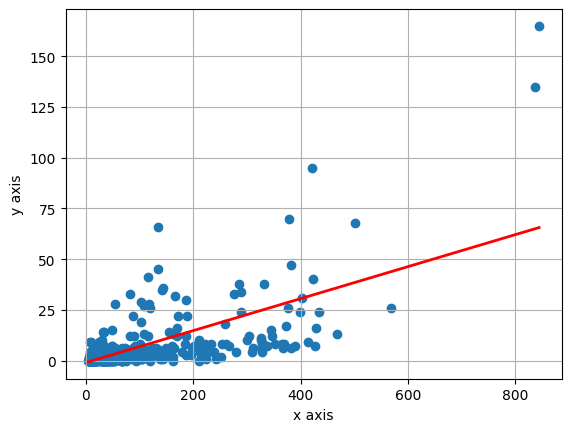

In [15]:
result = df[df['info-fullSumm0-entropy'] > 100].loc[:, ['year', 'id', 'info-fullSumm0-entropy']]
result = result.sort_values(by='info-fullSumm0-entropy', ascending=False)
scatter('info-fullSumm0-entropy', 'orthographic-summary' )